In [1]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# داده نمونه
X = [[25], [30], [35], [40], [22], [32]]  # Age
y = [0, 0, 1, 1, 0, 1]  # label (0: No, 1: Yes)

# devide data to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# train model
model = LogisticRegression()
model.fit(X_train, y_train)

# predict
predictions = model.predict(X_test)
print("Predictions:", predictions)


Predictions: [0 1]


In [27]:
# K-Means Clustering
from sklearn.cluster import KMeans
#sample data
data = np.array([[25, 80], [30, 60], [35, 85], [40, 40], [50, 20]])
#clusterization
# KMeans(n_clusters=3, random_state=42): Initializes a KMeans object 
# with the number of clusters set to 3 and a random state of 42 for reproducibility(42 is commonly used (due to a joke originating from The Hitchhiker's Guide to the Galaxy).).
kmeans = KMeans(n_clusters=2, random_state=42)
# kmeans.fit(data): Trains the K-Means model on the provided data.
kmeans.fit(data)
#show cluster labels and centers of clusters
print("Cluster Labels:", kmeans.labels_)
print("Centroids:", kmeans.cluster_centers_)

Cluster Labels: [0 0 0 1 1]
Centroids: [[30. 75.]
 [45. 30.]]


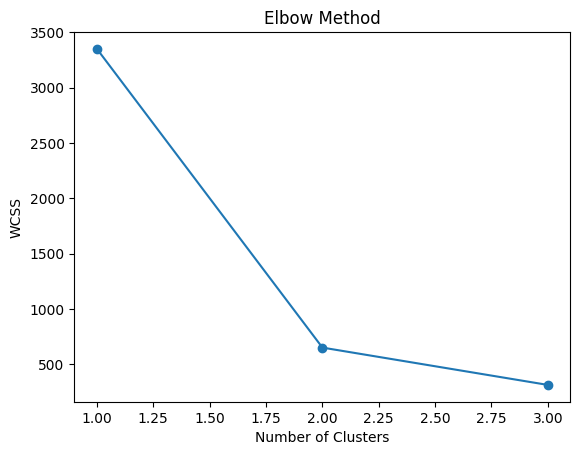

In [29]:
# K-Means Clustering
from sklearn.cluster import KMeans
#data sample
data = np.array([
    [25, 80],
    [30, 60],
    [35, 85],
    [40, 40],
    [50, 20]
])
#Elbow Method : find the optimal number of clusters
wcss = []
for i in range(1, 4):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
#plot the Elbow Method graph
plt.plot(range(1, 4), wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

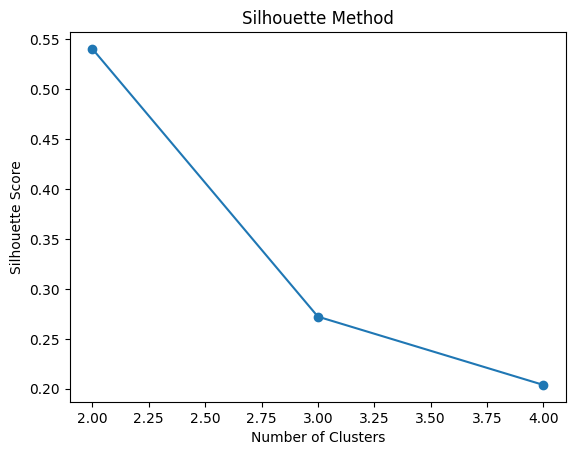

In [34]:
# silhouette_score: the silhouette score is a metric used to calculate the goodness of a clustering technique.
from sklearn.metrics import silhouette_score

data = np.array([
    [25, 80],
    [30, 60],
    [35, 85],
    [40, 40],
    [50, 20]
])
silhouette_scores = []
for i in range(2, 5):
    kmeans = KMeans(n_clusters=i, random_state=42)
    cluster_labels = kmeans.fit_predict(data)
    score = silhouette_score(data, cluster_labels)
    silhouette_scores.append(score)

plt.plot(range(2, 5), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')
plt.show()

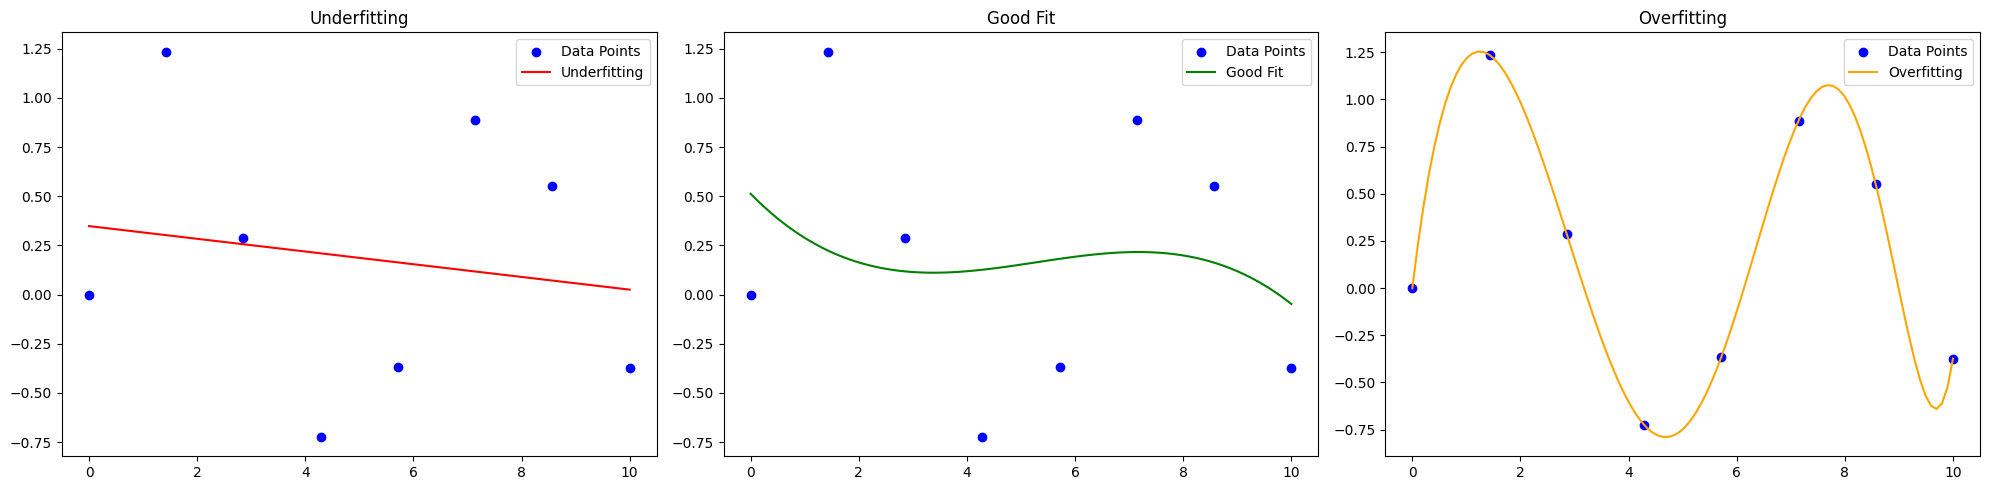

In [43]:
# sample data
# 100 points between 0 and 10
x = np.linspace(0, 10, 100)
# np.sin(x): calculates the sine of each element in the array x. 
# np.random.normal(0, 0.2, 100): generates random numbers from a normal distribution with a mean of 0 and a standard deviation of 0.2.
# avrage 0 and standard deviation 0.2 for 100 points
y = np.sin(x) + np.random.normal(0, 0.2, 100)  # adding noise to the data
x_points = np.linspace(0, 10, 8)
y_points = np.sin(x_points) + np.random.normal(0, 0.2, 8)
# plot the data points
plt.figure(figsize=(20, 5))
# underfitting curve
plt.subplot(1, 3, 1)
plt.scatter(x_points, y_points, color='blue', label='Data Points')
plt.plot(x, np.polyval(np.polyfit(x_points, y_points, 1), x), color='red', label='Underfitting')
plt.title('Underfitting')
plt.legend()

# Good Fit curve
plt.subplot(1, 3, 2)
plt.scatter(x_points, y_points, color='blue', label='Data Points')
plt.plot(x, np.polyval(np.polyfit(x_points, y_points, 3), x), color='green', label='Good Fit')
plt.title('Good Fit')
plt.legend()

# Overfitting curve
plt.subplot(1, 3, 3)
plt.scatter(x_points, y_points, color='blue', label='Data Points')
plt.plot(x, np.polyval(np.polyfit(x_points, y_points, 7), x), color='orange', label='Overfitting')
plt.title('Overfitting')
plt.legend()

plt.tight_layout()
plt.show()


In [46]:
#Cross-Validation and Metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# sample data
X, y = make_classification(
    n_samples=1000,  # number of samples
    n_features=10,   # number of features
    n_informative=8, # informative features
    n_redundant=2,   # redundant features
    random_state=42  # random state
)

# devide data to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# model
model = RandomForestClassifier(random_state=42)

# Cross-Validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy:", cv_scores.mean())

# train model
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)


Cross-Validation Accuracy: 0.8799999999999999
Accuracy: 0.87
Precision: 0.8333333333333334
Recall: 0.9042553191489362
F1-Score: 0.8673469387755102
